# NLP and Data Extraction Challenge
## Data Science and Machine Learning

Internship Brazil Labs - 2024

> The idea of this test is to understand your way of thinking, coding, and problem-solving skills. There is no right answer, just follow your instincts and share with us the solutions of the challenges below.

# 1) Exploratory Data Analysis (EDA) and Visualization

>EDA is a set of process of examining, cleaning, and transforming data to uncover patterns, spot anomalies, test hypotheses, or check assumptions.


>Data visualization is the act of taking information (data) and placing it into a visual context, such as a map or graph. Data visualizations make big and small data easier for the human brain to understand, and visualization also makes it easier to detect patterns, trends, and outliers in groups of data.

The **first challenge** is: explore information from **dataset.csv** file.
<br>
You can choose your preferred techniques or tools, be aware that sometimes less is more, present meaningful insights, and show us what you have found interesting on this dataset!

### Solution

In [129]:
# open csv file
import pandas as pd
import regex as re
import random

dados = pd.read_csv('resume_dataset.csv', delimiter=',', encoding='utf-8')

dados.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [130]:

#TODO: extract skills from text

def extractSkills(text):
    skills = {}
    text = text.lower()
    
    # regex to scrap skills and experience from text
    reg = r'(?<=\n|^)(?!skill details\s*\n)([^\n-]+)-\s*exprience\s*-\s*(less than \d+ year|\d+)\s*months?'
    matches = re.findall(reg, text)

    for match in matches:
        habilidades_str, experiencia = match

        experiencia = random.uniform(1,11) if experiencia.startswith('less than') else int(experiencia)

        if ',' in habilidades_str:
            habilidades = [habilidade.strip() for habilidade in habilidades_str.split(',')]

        else:
            habilidades = [habilidades_str.strip()]

        for habilidade in habilidades:
            skills[habilidade] = experiencia

    return skills


data_hab = []

for index, row in dados.iterrows():
    text = row['Resume']

    if 'skill details' in text.lower():
        habilidades = extractSkills(text)

        data_hab.append({'skills': habilidades})



df = pd.DataFrame([(skill, exp) for d in data_hab for skill, exp in d['skills'].items()], columns=['Skill', 'Level (months)'])

df


,Skill,Level (months)
0,javascript,24.000000
1,jquery,24.000000
2,python,24.000000
3,python,7.212006
4,statsmodels,12.000000
...,...,...
4115,testing,24.000000
4116,windows xp,24.000000
4117,css,6.000000
4118,database,6.000000


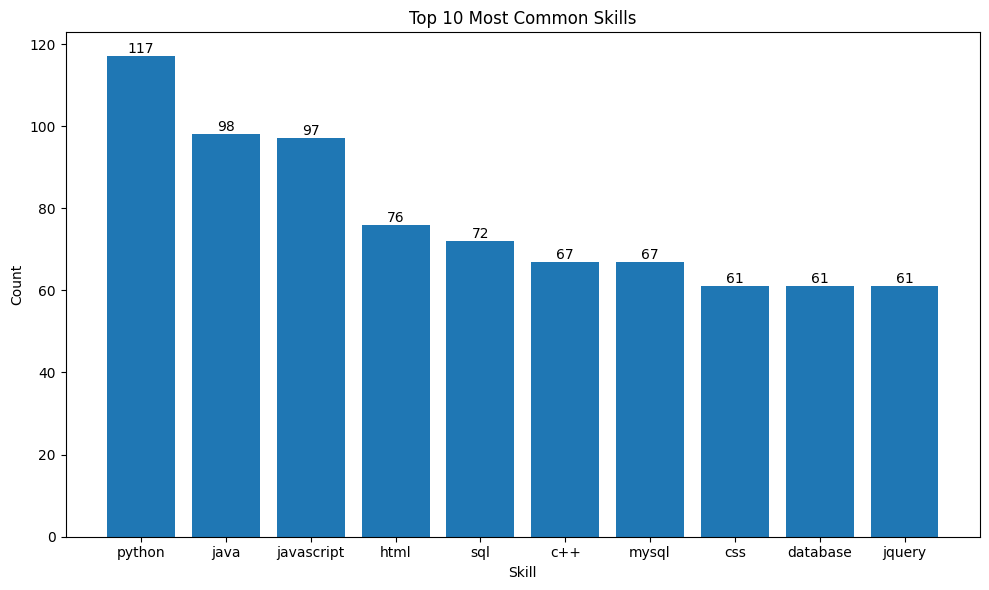

In [131]:
import matplotlib.pyplot as plt

# see most know skills
skill_counts = df['Skill'].value_counts()

sorted_skills = skill_counts.sort_values(ascending=False)

#sorted_skills.head(10)

top_skills = sorted_skills.head(10)

top_skill_names = top_skills.index.tolist()
top_skill_counts = top_skills.values

plt.figure(figsize=(10, 6))
bars = plt.bar(top_skill_names, top_skill_counts)

for bar, count in zip(bars, top_skill_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), 
             ha='center', va='bottom')

plt.xlabel('Skill')
plt.ylabel('Count')
plt.title('Top 10 Most Common Skills')

plt.tight_layout()
plt.show()

In [132]:
import numpy as np

average_experience_by_skill = df.groupby('Skill')['Level (months)'].mean()

average_experience_by_skill = np.floor(average_experience_by_skill)

sorted_experience = average_experience_by_skill.sort_values(ascending=False)

sorted_experience

Skill
staffing          125.0
power point       120.0
amazon mws        120.0
sap abap          120.0
node.js           120.0
                  ...  
finance             3.0
human resource      3.0
mathematics         3.0
aaa                 3.0
internet savvy      3.0
Name: Level (months), Length: 384, dtype: float64

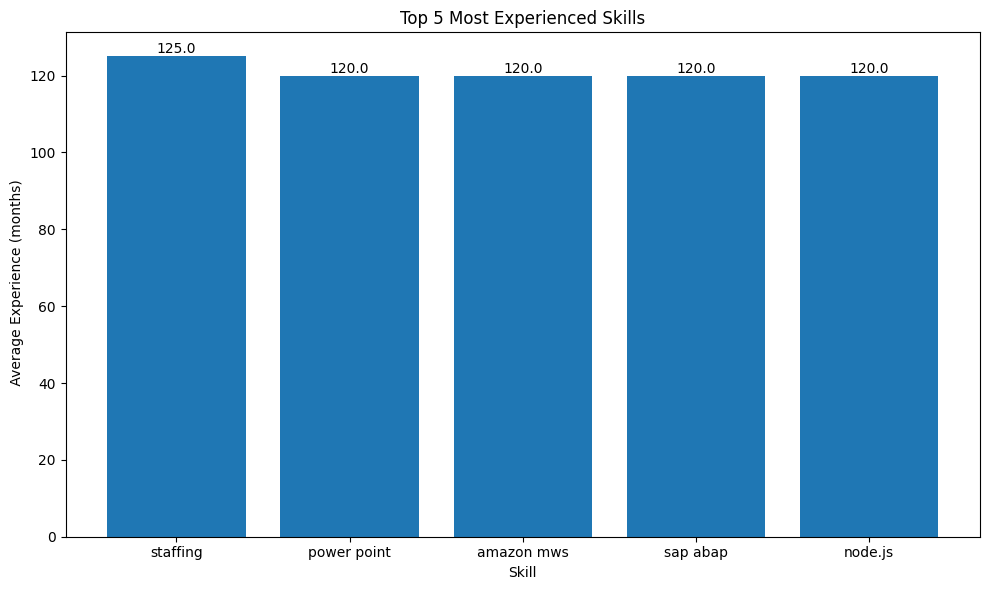

In [133]:
#visualization

top_skills = sorted_experience.head(5)

top_skill_names = top_skills.index.tolist()

top_skill_counts = top_skills.values

plt.figure(figsize=(10, 6))

bars = plt.bar(top_skill_names, top_skill_counts)

for bar, count in zip(bars, top_skill_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), 
             ha='center', va='bottom')
    
plt.xlabel('Skill')
plt.ylabel(' Average Experience (months)')

plt.title('Top 5 Most Experienced Skills')

plt.tight_layout()
plt.show()


### Explain the rationale of your decision about techniques and visualizations

### Understanding the dataset

Firstly, I read the dataset to understand the data and the problem. I've realized that a pattern emerged from the resumes: the Skill Details from each candidate. So, I decided to extract the skills and experience time from each candidate, to analyze the dataset and find usefull insights.

### Extracting the Skills

The way that the CSV file is organized, there's a column called "Category", and the whole resume is inside a "Resume" column. So, the real challenge was to scrap the data from inside the resume value.
My approach was to use a Regex to find the skills and experience time from each candidate. I've used the following Regex:

```(?<=\n|^)(?!skill details\s*\n)([^\n-]+)-\s*exprience\s*-\s*(less than \d+ year|\d+)\s*months?```

This Regex will find the skills and experience time from each candidate. The Regex is divided in 3 parts:

1. ```(?<=\n|^)``` - This part will find the start of the resume, or the start of a new line. 

2. ```(?!skill details\s*\n)``` - This part makes sure that the Regex will not find the "Skill Details" line, because it's not a skill.

3. ```([^\n-]+)-\s*exprience\s*-\s*(less than \d+ year|\d+)\s*months?``` - This detects the pattern of a skill and experience time. The first part ```([^\n-]+)``` will find the skill name, and the second part ```-\s*exprience\s*-\s*(less than \d+ year|\d+)\s*months?``` will find the experience time. The experience time can be "less than X year" or "X months".


When the regex finds a match, there's a condition to check if the skills are in a single line, separeted by commas. If that's the case, the skills are separeted by commas and the experience time is the same for all skills. 

Also, there's a treatment to when the experience is described as "less than 1 year". When that's the case, the experience time is set to a random number between 1 and 11.

### Data Analysis and Visualization

After extracting the skills and experience time, I wanted to understand what are the most common skills, and the skills with the most experience time. 

To do that, I've sorted the skills by count; and the skills by experience time. Then, I've plotted the top 10 skills by count and experience time in a bar chart using the *matplotlib* library.



# 2) NLP techniques / Machine Learning approach

The **second challenge** is: explore dataset information and apply NLP techniques or Machine Learning models to extract even more usefull information from data. Feel free to explore different machine learning models (e.g classification, clustering, etc) and make sure to explain the model results for each task you apply these ML models.
<br><br>
You can choose your preferred techniques or tools, be aware that sometimes less is more, present meaningful insights, and show us what you have found interesting on those files! (i.e: topic modeling, word distributions, etc)

### Machine Learning approach

## Language Assosiation Analysis

In [142]:

# Função para extrair habilidades do texto
def extractSkills(text):
    skills = set()
    text = text.lower()
    
    # regex para coletar habilidades
    reg = r'(?<=\n|^)(?!skill details\s*\n)([^\n-]+)-\s*exprience'
    matches = re.findall(reg, text)

    for match in matches:
        habilidades_str = match.strip()

        if ',' in habilidades_str:
            habilidades = [habilidade.strip() for habilidade in habilidades_str.split(',')]
        else:
            habilidades = [habilidades_str.strip()]

        for habilidade in habilidades:
            skills.add(habilidade)

    return list(skills)

# Carregar dados do arquivo CSV
dados = pd.read_csv('resume_dataset.csv', delimiter=',', encoding='utf-8')

# Lista para armazenar os currículos e habilidades extraídas
data_hab = []

# Iterar sobre os dados
for index, row in dados.iterrows():
    text = row['Resume']
    habilidades = extractSkills(text)
    data_hab.append({'Resume': index, 'Skills': habilidades})

# Criar DataFrame com os currículos e habilidades extraídas
df = pd.DataFrame(data_hab)

df

,Resume,Skills
0,0,"[python, javascript, jquery]"
1,1,"[machine learning, aws, python, keras, scipy, ..."
2,2,"[machine learning, matlab, python, mathematics..."
3,3,"[machine learning, r, python, sql, retail, lin..."
4,4,"[database management, core java, python, c, da..."
...,...,...
957,957,"[word, excel, ms office]"
958,958,[]
959,959,[]
960,960,"[pcb, pcb design, matlab]"


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Carregar os dados
data = pd.read_csv('seu_dataset.csv')

# Converta a coluna 'skills' em uma lista de listas
skills_list = data['skills'].apply(eval).tolist()

# Criar Conjuntos de Transações
te = TransactionEncoder()
te_ary = te.fit(skills_list).transform(skills_list)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicar Algoritmo de Associação (Apriori)
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Gerar regras de associação
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Analisar e Interpretar Resultados
print(rules)


### Explain the rationale of your NLP techniques/ML models usage and conclusions

# 3) Presentation

The **third** and last exercise is: present your findings to us, challenges of this exercise and how you handled them, and any other important information you will like to share with us.
<br><br>
We will be evaluating your Python code, how you organize your toughts and explanations during the presentation, and other aspects we see as important for a good presentation. You don't need to generate any output for this third task. 

Good luck! :)